## K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


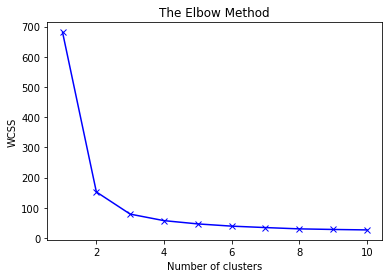

In [2]:
# Finding the optimum number of clusters for k-means classification

# Forming the iris features data
x = iris_df.iloc[:,0:4].values
from sklearn.cluster import KMeans
WCSS = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    kmeanModel.fit(x)
    WCSS.append(kmeanModel.inertia_)
# Plotting the results onto a line graph so we can guest the number of the best clusters to be used 
# by seeing the elbow point that after it there is change also but with small values  
plt.plot(K, WCSS, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

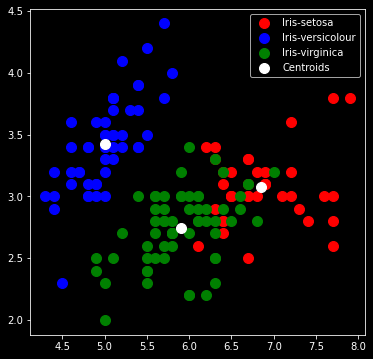

In [3]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3,random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# Visualising the clusters - On the first two columns
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))
    plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
    plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
    plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'white', label = 'Centroids')
    plt.legend();